In [49]:
import warnings
warnings.filterwarnings("ignore")
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import math
import csv
import pandas as pd
%matplotlib inline

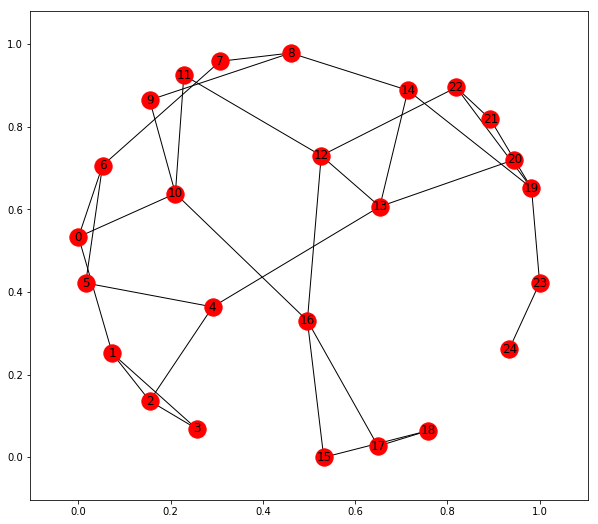

In [50]:
G = nx.Graph() 
nodes = list(range(25))
for i in nodes:
    G.add_node(i)

path = pd.read_excel('Path.xlsx')

for i in range(0, path.shape[0]):
    a = path.loc[i][0]
    b = path.loc[i][1]
    G.add_edge(a,b)
    G.add_edge(b,a)

plt.figure(figsize = (10,9))
nx.draw_networkx(G)

In [77]:
mon = pd.read_excel('Mon_stats.xlsx',index_col='Location')
mon['Time'] = (-1)*mon['Speed']+7

In [79]:
# Add attributes to nodes
for i in range(0, 25):
    G.node[i]['Stance']=mon.loc[i]['Stance']
    G.node[i]['Health']=mon.loc[i]['Health']
    G.node[i]['Speed']=mon.loc[i]['Speed']
    G.node[i]['Attack']=mon.loc[i]['Attack']
    G.node[i]['TR']=mon.loc[i]['TR']
    G.node[i]['TP']=mon.loc[i]['TP']
    G.node[i]['TS']=mon.loc[i]['TS']
    G.node[i]['TSPED']=mon.loc[i]['TSPED']
    G.node[i]['TH']=mon.loc[i]['TH']
    G.node[i]['Time']=mon.loc[i]['Time']

In [63]:
def hp_loss(monster, attack, speed):
    time = time_spend(monster, attack, speed)
    hp_loss = mon.loc[monster]['Attack']*time
 
    return hp_loss

In [64]:
def gain(monster, attack, speed):
    move_time = 7 - speed
    kill_time = mon.loc[monster]['Health']/attack
    
    if move_time <= kill_time:
        R_gain = 0
        P_gain = 0
        S_gain = 0
        Spd_gain = 0
    else:
        R_gain = mon.loc[monster]['TR']
        P_gain = mon.loc[monster]['TP']
        S_gain = mon.loc[monster]['TS']
        Spd_gain = mon.loc[monster]['TSPED']
        
    return R_gain, P_gain, S_gain, Spd_gain

In [65]:
def time_spend(monster, attack, speed):
    # attack value is the corresponding resources you have
    move_time = 7 - speed
    kill_time = mon.loc[monster]['Health']/attack
    
    if move_time <= kill_time:
        time = move_time        
    else:
        time = kill_time
    return time